In [3]:
# Ev Fiyat Tahmini
import pandas 
import numpy as np
from pandas import read_csv
filename = "home_data.csv"
sales = read_csv(filename)

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


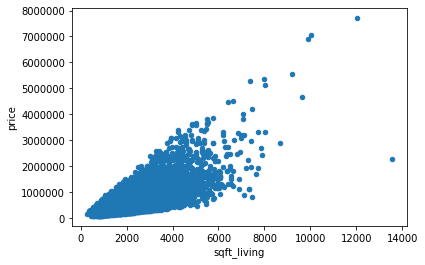

In [5]:
%matplotlib inline
sales.plot(x = "sqft_living", y = "price", kind = "scatter")

In [6]:
değişkenlerim = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "zipcode"] #Kullanmak istediğimiz değişkenleri yazdık.

In [7]:
sales[değişkenlerim].head()  #Kullanmak istediğimiz değişkenleri ekrana yazdırıp inceledik.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


In [8]:
from pandas import set_option
set_option("display.width", 100)
set_option("precision", 3)
description = sales[değişkenlerim].describe() #Modellerde Kendi seçtiğimiz değişkenleri kullanmasını tanımladık.
print(description)

        bedrooms  bathrooms  sqft_living   sqft_lot     floors    zipcode
count  21613.000  21613.000    21613.000  2.161e+04  21613.000  21613.000
mean       3.371      2.115     2079.900  1.511e+04      1.494  98077.940
std        0.930      0.770      918.441  4.142e+04      0.540     53.505
min        0.000      0.000      290.000  5.200e+02      1.000  98001.000
25%        3.000      1.750     1427.000  5.040e+03      1.000  98033.000
50%        3.000      2.250     1910.000  7.618e+03      1.500  98065.000
75%        4.000      2.500     2550.000  1.069e+04      2.000  98118.000
max       33.000      8.000    13540.000  1.651e+06      3.500  98199.000


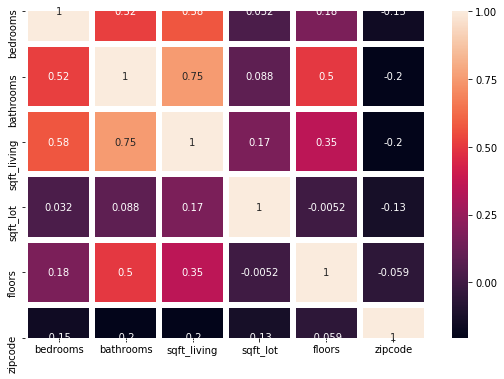

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

j = sales[değişkenlerim].corr()
f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(j, annot = True, linewidth = 5, ax = ax)

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales, train_size = 0.8, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
benim_model = LinearRegression()
benim_model.fit(train_data[değişkenlerim], train_data["price"]) 
#Eğitim verisindeki Değişkenlerim girdi verisi olarak, price değişkenini çıktı verisi olarak kullanacak

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Öğrenme gerçekleştirildi

In [15]:
ev1 = sales[sales["id"] == 5309101200]
ev1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.676,-122.37,1250,4880


In [16]:
print(ev1["price"])

1054    620000
Name: price, dtype: int64


In [17]:
print(benim_model.predict(ev1[değişkenlerim]))

[637556.26515923]


In [18]:
ev2 = sales[sales["id"] == 1925069082]
print(ev2["price"])

1361    2200000
Name: price, dtype: int64


In [19]:
print(benim_model.predict(ev2[değişkenlerim]))

[1274443.76531341]


In [20]:
print("R-Kare eğitim: {:.3f}" .format(benim_model.score(train_data[değişkenlerim], train_data["price"])))
print("R-Kare test: {:.3f}" .format(benim_model.score(test_data[değişkenlerim], test_data["price"])))

R-Kare eğitim: 0.518
R-Kare test: 0.499
